In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import mne
from mne.datasets.sleep_physionet.age import fetch_data

VAMOS USAR 4 pessoas para treinar o  modelo, 2 para teste

In [7]:
p1, p2, p3, p4, p5, p6 = 0, 1, 2 , 3, 4, 5

In [ ]:
[pf1, pf2, pf3, pf4, pf5,pf6 ] = fetch_data(subjects=[p1, p2, p3, p4, p5, p6], recording=[1])

In [ ]:
pf1

Para 1 só subject

In [ ]:
train1 =  mne.io.read_raw_edf(
    pf1[0],
    stim_channel="Event marker",
    infer_types=True,
    preload=True,
    verbose="error",  # ignore issues with stored filter settings
)
annot_train1 = mne.read_annotations(pf1[1])

In [ ]:
train1.set_annotations(annot_train1, emit_warning=False)

In [ ]:
train1.plot(
    start=60,
    duration=60,
    scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7, misc=1e-1),
)

epochs de 30 segundos

In [ ]:
events_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3": 4,
    "Sleep stage 4": 5,
    "Sleep stage R": 6,
}


In [ ]:
annot_train1.crop(annot_train1[1]["onset"] - 30 * 60, annot_train1[-2]["onset"] + 30 * 60)
train1.set_annotations(annot_train1, emit_warning=False)
events_train1, _ = mne.events_from_annotations(
    train1, event_id=events_id, chunk_duration=30.0
)

In [ ]:
colour_dict = {
    'C1': '#1f77b4',  # Blue
    'C2': '#ff7f0e',  # Orange
    'C3': '#2ca02c',  # Green
    'C4': '#d62728',  # Red
    'C5': '#9467bd', 
    'C6': '#ffff00'
}


In [ ]:
fig = mne.viz.plot_events(
    events_train1,
    event_id=events_id,
    sfreq=train1.info["sfreq"],
    color = colour_dict,
    first_samp=events_train1[0, 0],
)

In [ ]:
stage_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [ ]:
tmax = 30.0 - 1.0 / train1.info["sfreq"]  # tmax in included

epochs_train1 = mne.Epochs(
    raw=train1,
    events=events_train1,
    event_id=events_id,
    tmin=0.0,
    tmax=tmax,
    baseline=None,
)


In [ ]:
epochs_train1

In [ ]:
a =   [1, 2, 3]
print(len(a))

In [ ]:
x = range(0, len(a)-1)
print(x)

In [ ]:
ub = [None] * len(a)
for i in range(0, len(a)):
    ub[i] = i
print(ub)

In [ ]:
subject = [pf1, pf2, pf3, pf4, pf5,pf6 ]

In [ ]:
subject[1][0]

In [ ]:
for i in range(0, 1): 
    print(i)

In [ ]:
e = [5,2,1]

isto sou eu a tentar fazer uma função que faça tudo

In [11]:
def signal_set(subjects):
    sub = [None] * len(subjects)
    signal = [None] * len(subjects)
    annot = [None] * len(subjects)
    event_signal = [None] * len(subjects)
    epochs_signal = [None] * len(subjects)
    sub =  fetch_data(subjects = subjects, recording=[1])
    events_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3": 4,
    "Sleep stage 4": 5,
    "Sleep stage R": 6}



    for i in range(0, len(subjects)):
        signal[i] =  mne.io.read_raw_edf(
            sub[i][0],
            stim_channel="Event marker",
            infer_types=True,
            preload=True,
            verbose="error",  # ignore issues with stored filter settings
            )
        annot[i] =  mne.read_annotations(sub[i][1])
        signal[i].set_annotations(annot[i], emit_warning=False)

        signal[i].plot(
            start=60,
            duration=60,
            scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7, misc=1e-1),
        )

        # janelas de 30 segundos e observar localização de  eventos temporalmente
        annot[i].crop(annot[i][1]["onset"] - 30 * 60, annot[i][-2]["onset"] + 30 * 60)
        signal[i].set_annotations(annot[i], emit_warning=False)

        event_signal[i], _ = mne.events_from_annotations(
        signal[i], event_id=events_id, chunk_duration=30.0)

        fig = mne.viz.plot_events(
        event_signal[i],
        event_id=events_id,
        sfreq=signal[i].info["sfreq"],
        first_samp= event_signal[i][0, 0], )
        fig.suptitle('patient')
        plt.show()

        # isto n está a funcionar muito bem, ver depois a parte dos gráficos


        #Em epochs de 30 segundos
        tmax = 30.0 - 1.0 / signal[i].info["sfreq"]  # tmax in included

        epochs_signal[i] = mne.Epochs(
            raw=signal[i],
            events=event_signal[i],
            event_id=events_id,
            tmin=0.0,
            tmax=tmax,
            baseline=None,
        )
        del signal[i]


    

Using default location ~/mne_data for PHYSIONET_SLEEP...


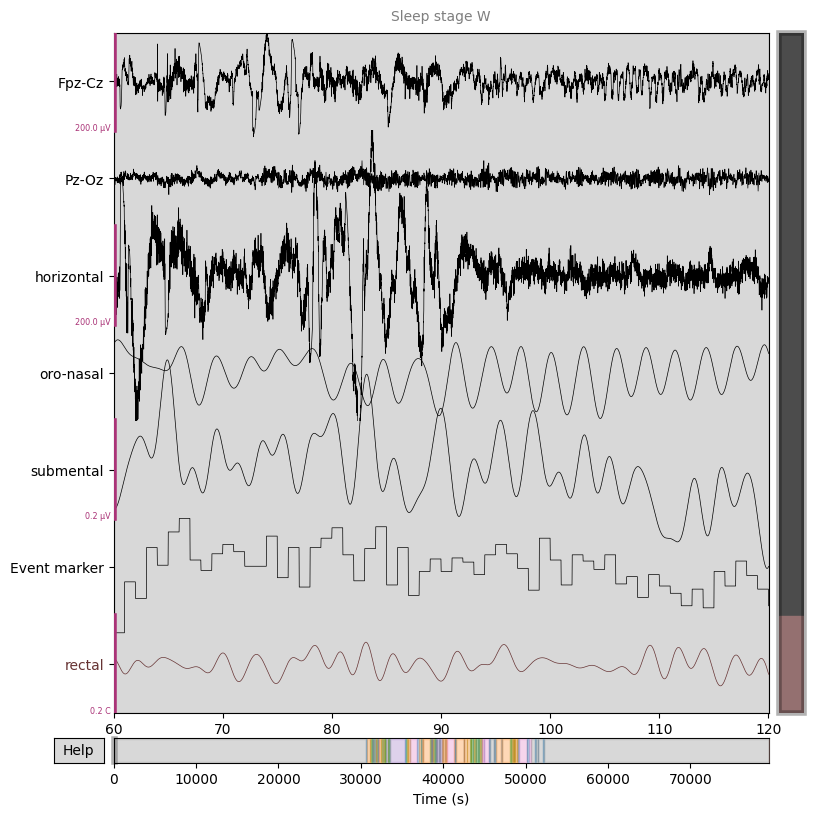

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


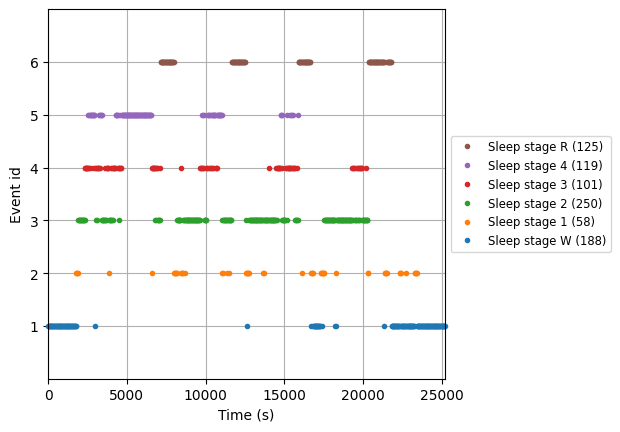

Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated


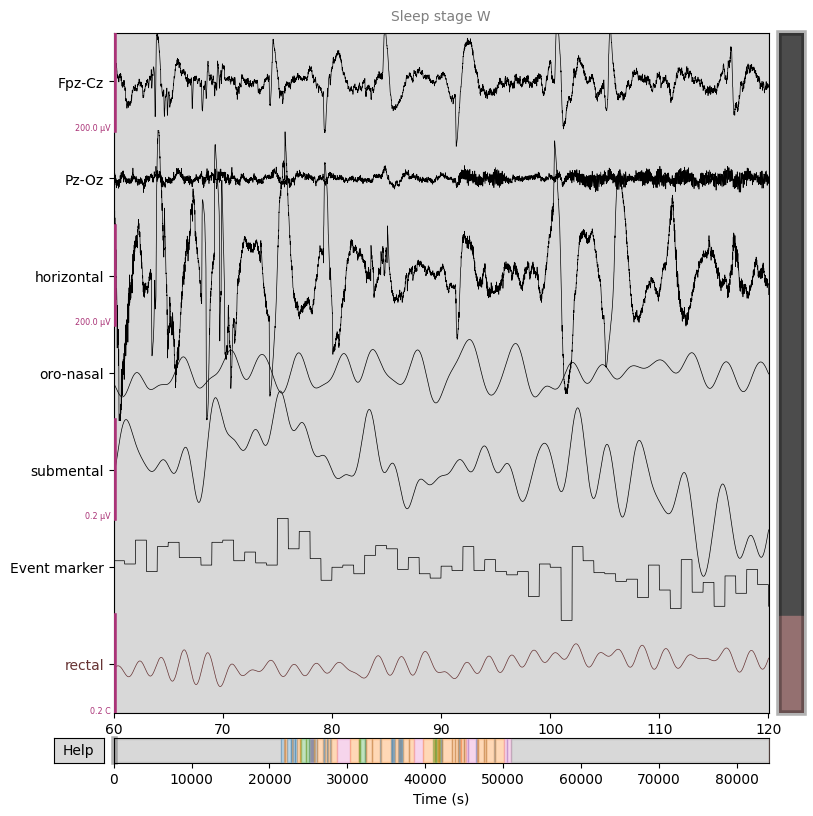

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


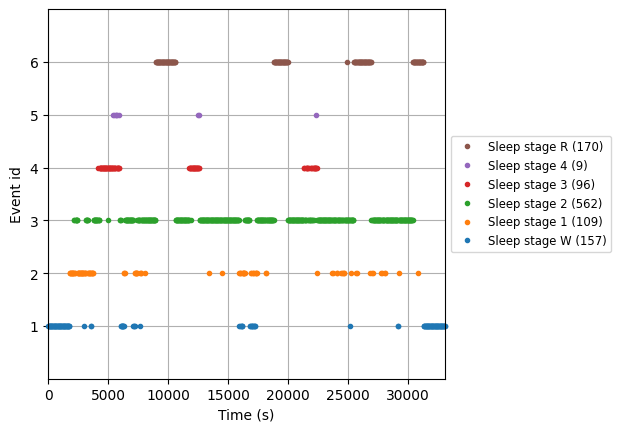

Not setting metadata
1103 matching events found
No baseline correction applied
0 projection items activated


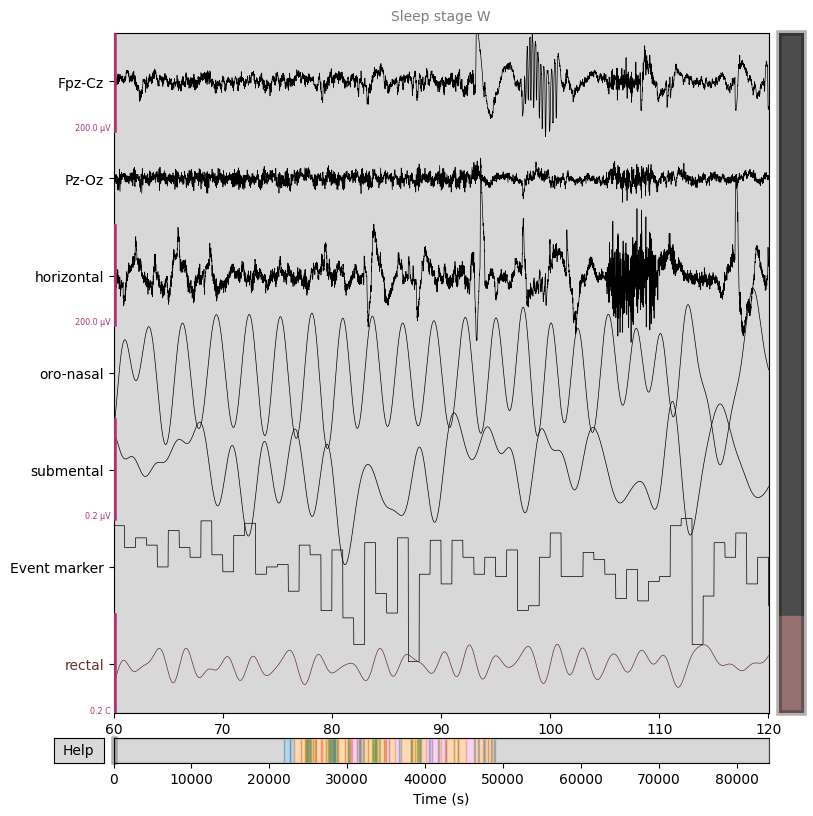

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


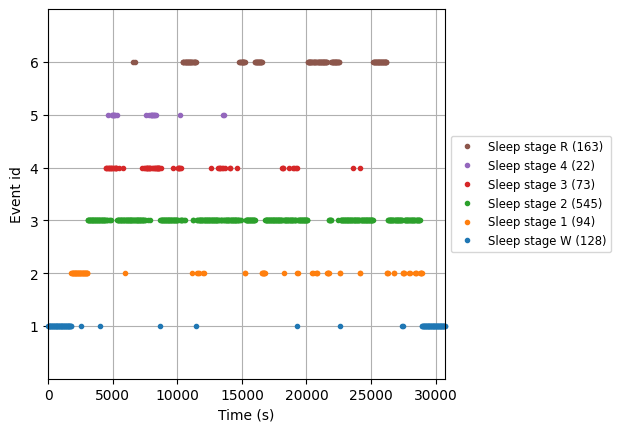

Not setting metadata
1025 matching events found
No baseline correction applied
0 projection items activated


IndexError: list assignment index out of range

In [12]:
subjects=[p1, p2, p3, p4, p5, p6]
signal_set(subjects)

In [ ]:
print(subjects)

In [ ]:
print(sub)